In [14]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [15]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [16]:
# Read the airbnb dataset
df = pd.read_csv('datasets/airbnb-cleaned-europe-dataset.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [17]:
city_name = 'Amsterdam'

def get_copy_by_city_name(cityName):
    temp = df.copy()
    temp = temp[temp['City'] == cityName]
    temp.drop('City', axis=1, inplace=True)
    return temp

df = get_copy_by_city_name(city_name)

In [18]:
df = df.join(pd.get_dummies(df['Day']))
df.drop('Private Room', axis=1, inplace=True)
df.drop('Shared Room', axis=1, inplace=True)
df = df.join(pd.get_dummies(df['Room Type']))
df.drop('Room Type', axis=1, inplace=True)
df.drop('Day', axis=1, inplace=True)
df['Superhost'] = df['Superhost'].astype(int)
df.drop('Shared room', axis=1, inplace=True)
df.drop('Attraction Index', axis=1, inplace=True)
df.drop('Restraunt Index', axis=1, inplace=True)
df.head()

,Price,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Weekday,Weekend,Entire home/apt,Private room
0,194.033698,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,1,0,0,1
1,344.245776,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,1,0,0,1
2,264.101422,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,1,0,0,1
3,433.529398,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,1,0,0,1
4,485.552926,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,1,0,0,1


## DBSCAN

In [19]:
model = DBSCAN(eps = 0.8, min_samples=19).fit(df)
print(model)

DBSCAN(eps=0.8, min_samples=19)


## VIZ

In [26]:
outliers_df = pd.DataFrame(df)
#print(Counter(model.labels_))
#print(outliers_df[model.labels_==-1])

In [44]:
df[:0]

,Price,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Weekday,Weekend,Entire home/apt,Private room


Text(0.5, 1.0, 'DBSCAN for outlier Detection')

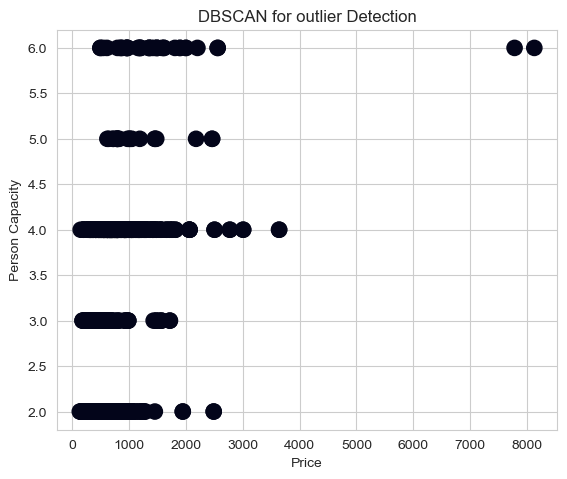

In [46]:
fig = plt.figure()
ax = fig.add_axes([.1,.1, 1,1])
colors = model.labels_

#ax.scatter(df[:0], df[:1], c=colors, s=120)
ax.scatter(df['Price'], df['Person Capacity'], c=colors, s=120)

ax.set_xlabel('Price')
ax.set_ylabel('Person Capacity')

plt.title('DBSCAN for outlier Detection')